In [1]:
pip install mysql-connector-python


In [9]:
import mysql.connector

try:
    conn = mysql.connector.connect(
        host="localhost",
        user="root",
        password="Daraja@gmail"  # replace with your root password
    )
    print("✅ Connection successful")
    conn.close()
except Exception as e:
    print("❌ Error:", e)


✅ Connection successful


In [14]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

# Connect to MySQL (update credentials as needed)
conn = mysql.connector.connect(
    host="localhost",
    user="root",        # replace with your MySQL username
    password="Daraja@gmail",  
    database="superstore_db"  # your database name
)


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9884\1663232950.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_region = pd.read_sql(query, conn)


    Region  total_sales  total_profit
0     West  713471.3445   106021.1495
1     East  672194.0540    90672.0127
2  Central  497800.8728    40128.9030
3    South  388983.5850    46035.6890


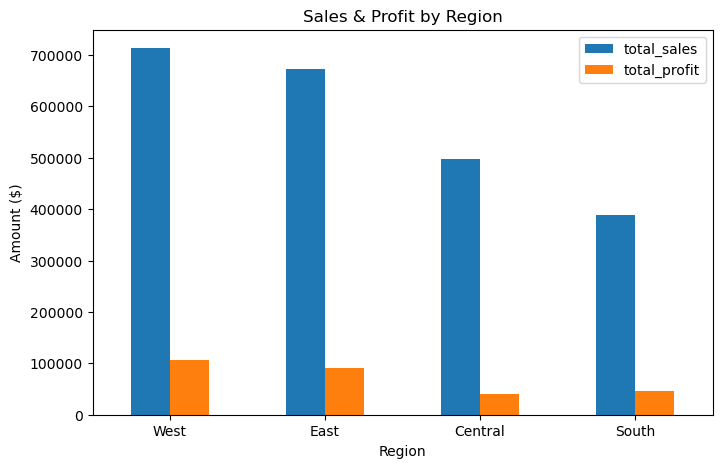

In [17]:
#sales & product by Region
query = """
SELECT Region,
       SUM(Sales) AS total_sales,
       SUM(Profit) AS total_profit
FROM superstore_dataset
GROUP BY Region
ORDER BY total_sales DESC;
"""
df_region = pd.read_sql(query, conn)
print(df_region)

# Plot
df_region.set_index("Region")[["total_sales","total_profit"]].plot(kind="bar", figsize=(8,5))
plt.title("Sales & Profit by Region")
plt.ylabel("Amount ($)")
plt.xticks(rotation=0)
plt.savefig(r"C:\Users\ADMIN\Documents\sales_profit_by_region.png")
plt.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9884\2868171471.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_region = pd.read_sql(query, conn)


    Region  total_sales  total_profit
0     West  713471.3445   106021.1495
1     East  672194.0540    90672.0127
2  Central  497800.8728    40128.9030
3    South  388983.5850    46035.6890


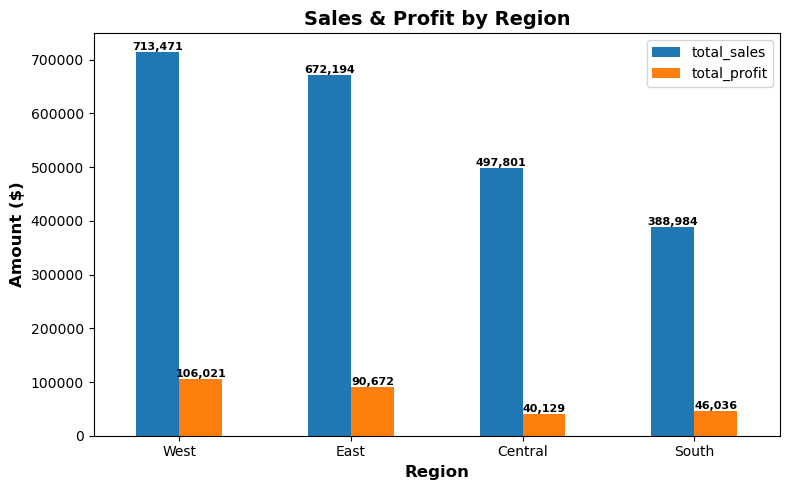

In [47]:
import matplotlib.pyplot as plt

query = """
SELECT Region,
       SUM(Sales) AS total_sales,
       SUM(Profit) AS total_profit
FROM superstore_dataset
GROUP BY Region
ORDER BY total_sales DESC;
"""
df_region = pd.read_sql(query, conn)
print(df_region)
ax = df_region.set_index("Region")[["total_sales","total_profit"]].plot(
    kind="bar", figsize=(8,5), rot=0)

plt.title("Sales & Profit by Region", fontsize=14, fontweight="bold")
plt.ylabel("Amount ($)", fontsize=12, fontweight="bold")
plt.xlabel("Region", fontsize=12, fontweight="bold")
plt.xticks(rotation=0)
plt.grid(False)

# Add data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=8, fontweight="bold")

plt.tight_layout()
plt.savefig(r"C:\Users\ADMIN\Documents\sales_profit_by_region.png")
plt.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9884\3898809954.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_category = pd.read_sql(query, conn)


          Category  total_profit
0       Technology   145387.0966
1  Office Supplies   120489.8864
2        Furniture    16980.7712


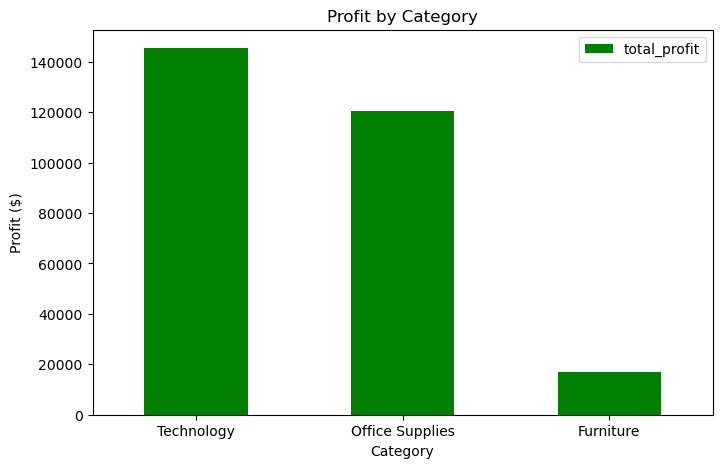

In [42]:
#Profit by Category & Sub-Category

query = """
SELECT Category,
       SUM(Profit) AS total_profit
FROM superstore_dataset
GROUP BY Category
ORDER BY total_profit DESC;
"""
df_category = pd.read_sql(query, conn)
print(df_category)

# Plot
df_category.plot(x="Category", y="total_profit", kind="bar", figsize=(8,5), color="green")
plt.title("Profit by Category")
plt.ylabel("Profit ($)")
plt.xticks(rotation=0)
plt.savefig("C:/Users/ADMIN/Documents/sales_profit_by_subcategory.png")
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9884\3573493713.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_subcatt = pd.read_sql(query, conn)


          Category  total_profit
0       Technology   145387.0966
1  Office Supplies   120489.8864
2        Furniture    16980.7712


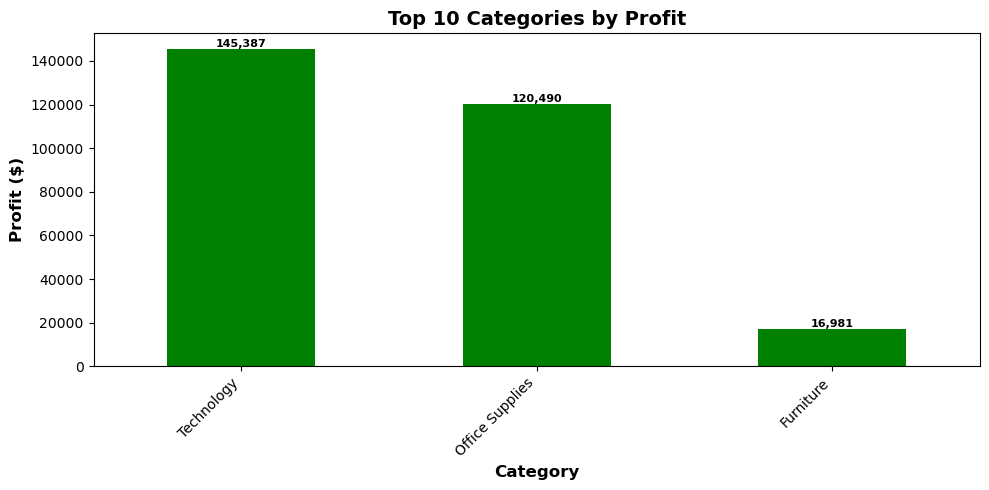

In [50]:
query = """
SELECT Category,
       SUM(Profit) AS total_profit
FROM superstore_dataset
GROUP BY Category
ORDER BY total_profit DESC
LIMIT 10;
"""
df_subcatt = pd.read_sql(query, conn)
print(df_subcatt)

ax = df_subcatt.plot(x="Category", y="total_profit", kind="bar",
                    figsize=(10,5), color="green", legend=False)

plt.title("Top 10 Categories by Profit", fontsize=14, fontweight="bold")
plt.ylabel("Profit ($)", fontsize=12, fontweight="bold")
plt.xlabel("Category", fontsize=12, fontweight="bold")
plt.xticks(rotation=45, ha="right")
plt.grid(False)

for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=8, fontweight="bold")

plt.tight_layout()
plt.savefig(r"C:\Users\ADMIN\Documents\profit_by_category.png")
plt.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9884\2940805733.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_subcatt = pd.read_sql(query, conn)


          Category sub_category  total_profit
0       Technology      Copiers    55617.8249
1       Technology       Phones    44447.8791
2       Technology  Accessories    41936.6357
3  Office Supplies        Paper    32712.1690
4  Office Supplies      Binders    29983.0213
5        Furniture       Chairs    26590.1663
6  Office Supplies      Storage    21527.9083
7  Office Supplies   Appliances    18138.0054
8        Furniture  Furnishings    11588.6420
9  Office Supplies          Art     6527.7870


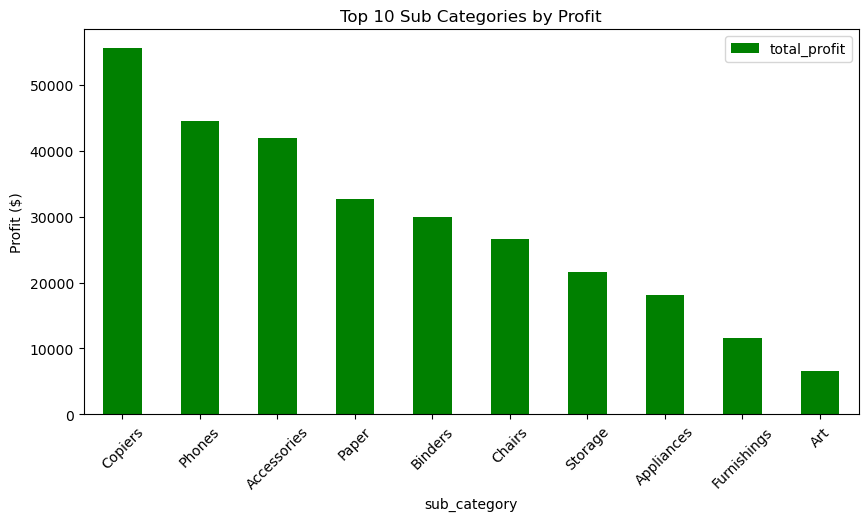

In [36]:
#Profit by Category & Sub-Category

query = """
SELECT Category, `Sub-Category` AS sub_category,
       SUM(Profit) AS total_profit
FROM superstore_dataset
GROUP BY Category, `Sub-Category`
ORDER BY total_profit DESC
LIMIT 10;
"""
df_subcatt = pd.read_sql(query, conn)
print(df_subcatt)

# Plot
df_subcat.plot(x="sub_category", y="total_profit", kind="bar", figsize=(10,5), color="green")
plt.title("Top 10 Sub Categories by Profit")
plt.ylabel("Profit ($)")
plt.xticks(rotation=45)
plt.savefig(r"C:\Users\ADMIN\Documents\sales_profit_by_subcategory.png")
plt.show()



C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9884\3701058050.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_subcat = pd.read_sql(query, conn)   # ✅ keep consistent name


          Category sub_category  total_profit
0       Technology      Copiers    55617.8249
1       Technology       Phones    44447.8791
2       Technology  Accessories    41936.6357
3  Office Supplies        Paper    32712.1690
4  Office Supplies      Binders    29983.0213
5        Furniture       Chairs    26590.1663
6  Office Supplies      Storage    21527.9083
7  Office Supplies   Appliances    18138.0054
8        Furniture  Furnishings    11588.6420
9  Office Supplies          Art     6527.7870


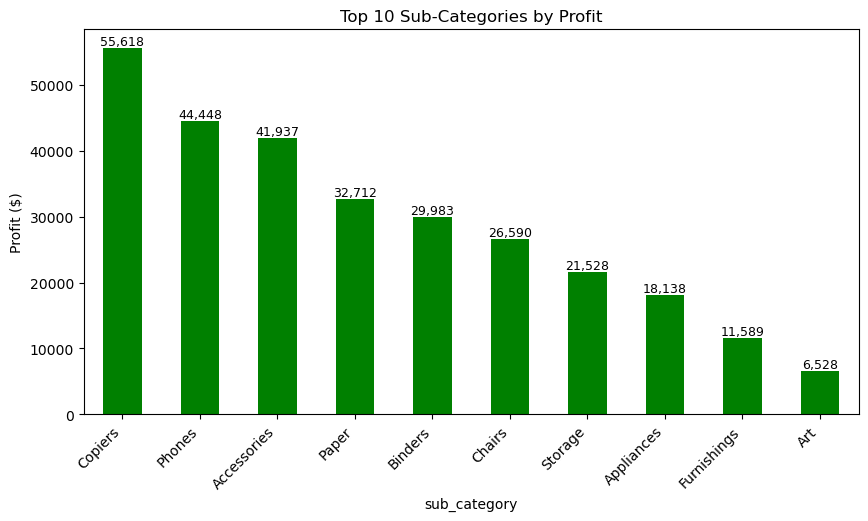

In [44]:
query = """
SELECT Category, `Sub-Category` AS sub_category,
       SUM(Profit) AS total_profit
FROM superstore_dataset
GROUP BY Category, `Sub-Category`
ORDER BY total_profit DESC
LIMIT 10;
"""
df_subcat = pd.read_sql(query, conn)   # ✅ keep consistent name
print(df_subcat)

# Plot
ax = df_subcat.plot(
    x="sub_category", y="total_profit",
    kind="bar", figsize=(10,5), color="green", legend=False
)
plt.title("Top 10 Sub-Categories by Profit")
plt.ylabel("Profit ($)")
plt.xticks(rotation=45, ha="right")

# ✅ Add labels on each bar
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():,.0f}',   # formatted with commas
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom', fontsize=9, color="black", rotation=0
    )

# Save image (better to keep in project repo images folder)
plt.savefig(r"C:\Users\ADMIN\Documents\sales_profit_by_subcategory.png", bbox_inches="tight")
plt.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9884\2411408739.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_customers = pd.read_sql(query, conn)


        Customer Name  total_sales  total_profit
0         Sean Miller    25043.050    -1980.7393
1        Tamara Chand    19017.848     8964.4826
2        Raymond Buch    15117.339     6976.0959
3        Tom Ashbrook    14595.620     4703.7883
4       Adrian Barton    14355.611     5438.9075
5        Sanjit Chand    14142.334     5757.4119
6        Ken Lonsdale    14071.917      768.8712
7        Hunter Lopez    12873.298     5622.4292
8        Sanjit Engle    12209.438     2650.6769
9  Christopher Conant    12129.072     2177.0493


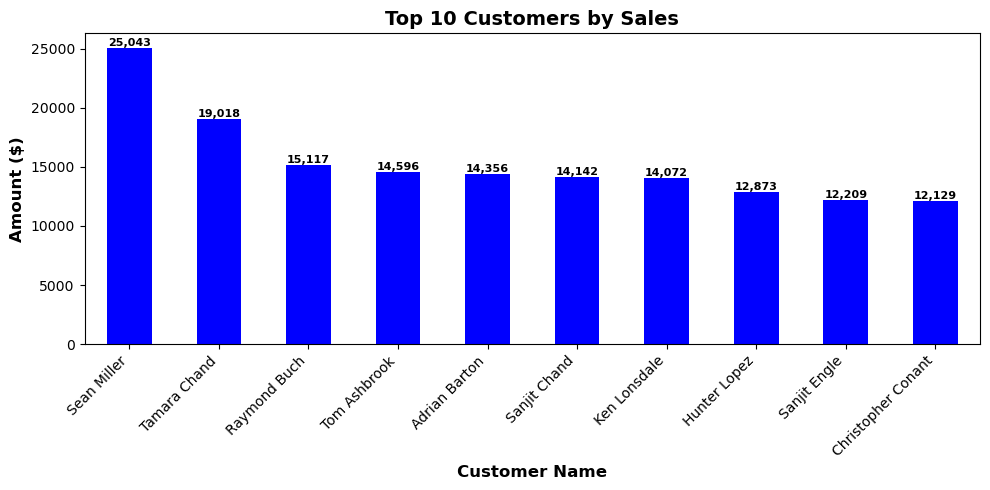

In [59]:
query = """
SELECT `Customer Name`,
       SUM(Sales) AS total_sales,
       SUM(Profit) AS total_profit
FROM superstore_dataset
GROUP BY `Customer Name`
ORDER BY total_sales DESC
LIMIT 10;
"""
df_customers = pd.read_sql(query, conn)
print(df_customers)
ax = df_customers.plot(x="Customer Name", y="total_sales", kind="bar",
                       figsize=(10,5), color="blue", legend=False)

plt.title("Top 10 Customers by Sales", fontsize=14, fontweight="bold")
#plt.ylabel("Sales ($)","Profit", fontsize=12, fontweight="bold")
plt.ylabel("Amount ($)", fontsize=12, fontweight="bold")
plt.xlabel("Customer Name", fontsize=12, fontweight="bold")
plt.xticks(rotation=45, ha="right")
plt.grid(False)

for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=8, fontweight="bold")

plt.tight_layout()
plt.savefig(r"C:\Users\ADMIN\Documents\top_customers.png")
plt.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9884\2734904854.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_monthly = pd.read_sql(query, conn)


      month  monthly_sales  monthly_profit
0   2014-01     14161.3490       2416.6891
1   2014-02      4119.8160        781.8428
2   2014-03     55526.1990        419.4310
3   2014-04     28139.5610       3450.9602
4   2014-05     23634.6670       2732.5806
5   2014-06     34508.9956       5054.6394
6   2014-07     33500.8730       -926.1018
7   2014-08     27603.5125       5352.9984
8   2014-09     81496.8068       8214.6842
9   2014-10     31394.9410       3452.0192
10  2014-11     78297.2407       9181.7825
11  2014-12     69379.8365       8912.9007
12  2015-01     18085.1156      -3291.0150
13  2015-02     11924.2720       2807.0147
14  2015-03     38621.2920       9683.8618
15  2015-04     32640.4825       3899.2073
16  2015-05     29325.9705       4552.1094
17  2015-06     24659.6840       3373.9900
18  2015-07     28524.5210       3188.4990
19  2015-08     36380.9282       5305.4516
20  2015-09     63704.3020       8011.9049
21  2015-10     31382.1555       2815.3738
22  2015-11

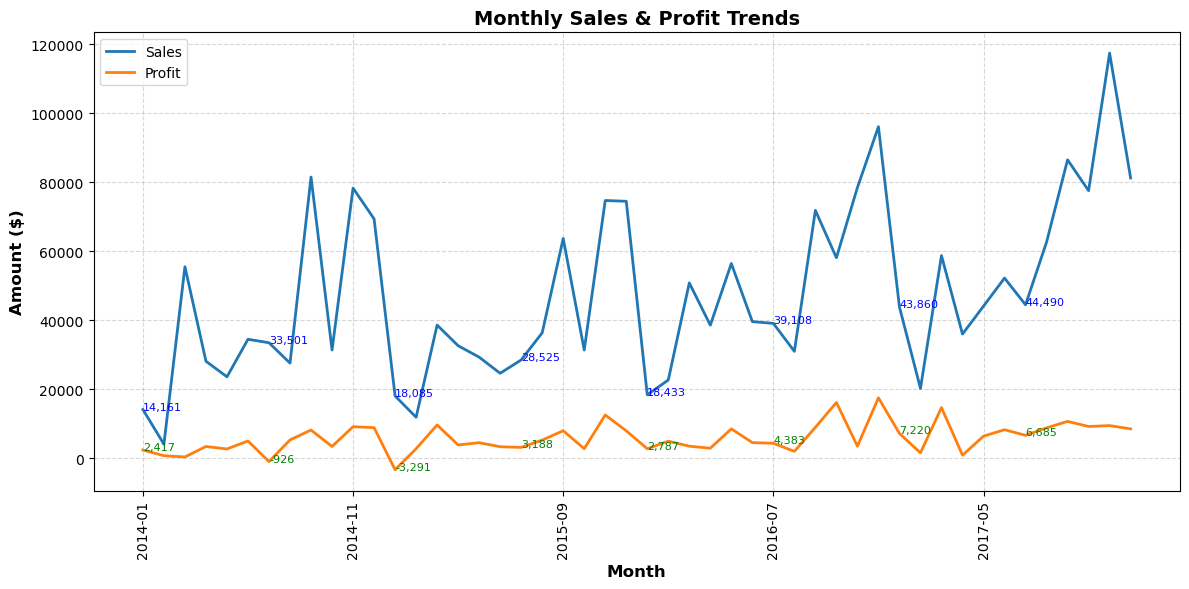

In [68]:
query = """
SELECT DATE_FORMAT(STR_TO_DATE(`Order Date`, '%m/%d/%Y'), '%Y-%m') AS month,
       SUM(Sales) AS monthly_sales,
       SUM(Profit) AS monthly_profit
FROM superstore_dataset
GROUP BY month
ORDER BY month;
"""
df_monthly = pd.read_sql(query, conn)
print(df_monthly)
ax = df_monthly.plot(x="month", y=["monthly_sales","monthly_profit"],
                     figsize=(12,6), linewidth=2)

plt.title("Monthly Sales & Profit Trends", fontsize=14, fontweight="bold")
plt.ylabel("Amount ($)", fontsize=12, fontweight="bold")
plt.xlabel("Month", fontsize=12, fontweight="bold")
plt.xticks(rotation=90)
plt.legend(["Sales", "Profit"], fontsize=10)
plt.grid(True, linestyle="--", alpha=0.5)

# Add data labels every 6 months to avoid clutter
for i, row in df_monthly.iloc[::6].iterrows():
    plt.text(i, row["monthly_sales"], f'{row["monthly_sales"]:,.0f}', fontsize=8, color="blue")
    plt.text(i, row["monthly_profit"], f'{row["monthly_profit"]:,.0f}', fontsize=8, color="green")

plt.tight_layout()
plt.savefig(r"C:\Users\ADMIN\Documents\monthly_trends.png")
plt.show()
